# Instruction 2

# Part 1: Data Preparation

In [1]:
# load the new dataset, download the dataset
from datasets import load_dataset

ds = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")

In [2]:
# Find what we can analyze
dataset = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")
dataset
# it seems we only have "train" to analyze

DatasetDict({
    train: Dataset({
        features: ['sentiment', 'comment'],
        num_rows: 1500
    })
})

In [3]:
from datasets import get_dataset_split_names
# get split names
get_dataset_split_names("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")

['train']

In [4]:
# Find what we can analyze
dataset_train = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data", split = 'train')
dataset_train

Dataset({
    features: ['sentiment', 'comment'],
    num_rows: 1500
})

In [5]:
# find what we have
dataset_train.data[0:2]

pyarrow.Table
sentiment: string
comment: string
----
sentiment: [["not nostalgia","nostalgia"]]
comment: [["He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.","The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel"]]

The code gives us 2 examples of what we can see in the dataset
The first one is sentiment with "not nostalgia" and the comment is "He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life."
The second one is sentiment with "nostalgia" and comment with "The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel"

In [6]:
# if I do this, I can access only the sentiment in data 0
dataset_train[0]["sentiment"]

'not nostalgia'

In [7]:
# if I do this, I can access only the comment in data 0
dataset_train[0]["comment"]

'He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.'

<br>

Short conclusion:
The dataset has only two features, which is sentiment and comment. <br>
In sentiment, there is only "nostalgia" and "not nostalgia". <br>
In the comment shows what is the comment. 

---

# Part 2: Data Transformation

### 2.1 Converting Dictionary into Pandas Dataframe

In [8]:
import pandas as pd

import helpers.data_mining_helpers as dmh

# ceate a dataframe using the pd.Dataframe
X = pd.DataFrame(dataset_train)

In [9]:
len(X)

1500

In [10]:
X[0:2]

sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...

In [11]:
for t in X["comment"][:2]:
    print(t)

He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.
The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel


### Add a column to the dataframe

In [12]:
X["categories"] = X["sentiment"].apply(lambda x: 1 if x == "nostalgia" else 0)

### 2.2 Familiarize the data

In [13]:
# a simple query
X[:10][["sentiment", "comment"]]

sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4      nostalgia  listening to his songs reminds me of my mum wh...
5      nostalgia  Every time I heard this song as a child, I use...
6      nostalgia  My dad loved listening to Jim Reeves, when I w...
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...
8  not nostalgia           Wherever you  are you always in my heart
9  not nostalgia  Elvis will always be number one no one can com...

In [14]:
X[:10][["categories"]]

categories
0           0
1           1
2           1
3           0
4           1
5           1
6           1
7           1
8           0
9           0

In [15]:
# use loc (by label)
X.loc[:10, "comment"]

0     He was a singer with a golden voice that I lov...
1     The mist beautiful voice ever I listened to hi...
2     I have most of Mr. Reeves songs.  Always love ...
3     30 day leave from 1st tour in Viet Nam to conv...
4     listening to his songs reminds me of my mum wh...
5     Every time I heard this song as a child, I use...
6     My dad loved listening to Jim Reeves, when I w...
7     i HAVE ALSO LISTENED TO Jim Reeves since child...
8              Wherever you  are you always in my heart
9     Elvis will always be number one no one can com...
10    ill bet if they begin to play this song on the...
Name: comment, dtype: object

---

# Part 3: Data Mining using Pandas

### 3.1 Check for missing values

In [16]:
X.isnull()

# the result looks fine, there are no missing values

sentiment  comment  categories
0         False    False       False
1         False    False       False
2         False    False       False
3         False    False       False
4         False    False       False
...         ...      ...         ...
1495      False    False       False
1496      False    False       False
1497      False    False       False
1498      False    False       False
1499      False    False       False

[1500 rows x 3 columns]

In [17]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

# from the result we know that there are no missing values

sentiment                             comment  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                           categories  
0  The amoung of missing records is:   
1                                   0

### 3.2 Check for duplicate data

In [18]:
# check for duplication
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [19]:
sum(X.duplicated())

1

In [20]:
sum(X.duplicated("comment"))
# there was a duplication in comment!!!

1

In [21]:
X.drop_duplicates(keep = "first", inplace = False)
# I wanted to delete the data with by keeping the regular data and delete one of the duplicated data only

sentiment                                            comment  \
0     not nostalgia  He was a singer with a golden voice that I lov...   
1         nostalgia  The mist beautiful voice ever I listened to hi...   
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4         nostalgia  listening to his songs reminds me of my mum wh...   
...             ...                                                ...   
1495  not nostalgia  i don't know!..but the opening of the video,.....   
1496  not nostalgia  it's sad this is such a beautiful song when yo...   
1497  not nostalgia  Dear Friend, I think age and time is not that ...   
1498      nostalgia  I was born in 1954 and started to be aware of ...   
1499      nostalgia  This is the first CD I bought after my marriag...   

      categories  
0              0  
1              1  
2              1  
3              0  
4              1  
...          ...  
1495           0  
1496           0  
1497           0  
1498           1  
1499           1  

[1499 rows x 3 columns]

In [22]:
len(X)

1500

---

# Part 4: Data Preprocessing

### 4.1 Sampling

In [23]:
import numpy as np

In [24]:
categories = {"not nostalgia", "nostalgia"}

In [25]:
# Though sampling might not be needed in the dataset, it is just for practice
X_sample = X.sample(n=1000)

In [26]:
# check the len of sample
len(X_sample)

1000

In [27]:
# check what we have sampled
X_sample[0:4]

sentiment                                            comment  \
485   not nostalgia  Those guys could compose the most beautiful mu...   
433       nostalgia  Someone in 2018? I miss my childhood my pops l...   
1450      nostalgia  when i was a kid, my father liked to open this...   
1034      nostalgia  I was in the sixth grade the first time i hear...   

      categories  
485            0  
433            1  
1450           1  
1034           1

---

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

### Bar chart for X

sentiment
not nostalgia    750
nostalgia        750
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

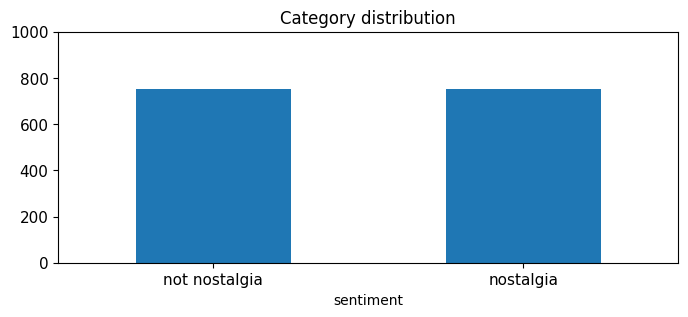

In [29]:
# plot the bar graph
print(X.sentiment.value_counts())

# plot a barchart for X
X.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 1000],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

### Bar chart for X_sample

sentiment
nostalgia        503
not nostalgia    497
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

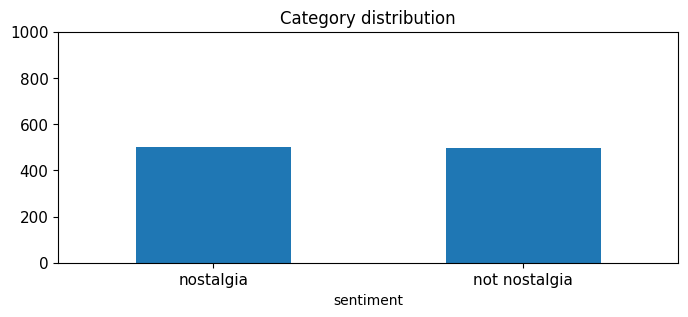

In [30]:
# print the barchart for X_sample
print(X_sample.sentiment.value_counts())

#plot a barchart for X_sample
X_sample.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 1000],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

### Side by side comparison for X and X_sample

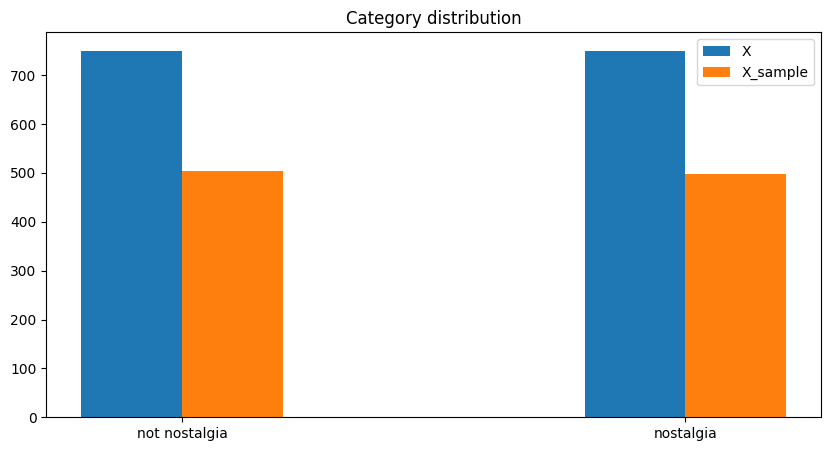

In [31]:
N = 2

ind = np.arange(N)

plt.figure(figsize = (10, 5))

width = 0.2

plt.bar(ind, X.sentiment.value_counts(), width, label="X")
plt.bar(ind+width, X_sample.sentiment.value_counts(), width, label="X_sample")

plt.title("Category distribution")

plt.xticks(ind + width / 2, categories)

plt.legend(loc="best")
plt.show()

---

### 4.2 Feature Creation

In [32]:
import nltk

In [33]:
# make a unigram for the dataset
X['unigrams'] = X['comment'].apply(lambda x: dmh.tokenize_text(x))

In [34]:
X[0:4]["unigrams"]

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
Name: unigrams, dtype: object

In [35]:
X[0:4]

sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   

   categories                                           unigrams  
0           0  [He, was, a, singer, with, a, golden, voice, t...  
1           1  [The, mist, beautiful, voice, ever, I, listene...  
2           1  [I, have, most, of, Mr., Reeves, songs, ., Alw...  
3           0  [30, day, leave, from, 1st, tour, in, Viet, Na...

In [36]:
list(X[0:1]['unigrams'])

[['He',
  'was',
  'a',
  'singer',
  'with',
  'a',
  'golden',
  'voice',
  'that',
  'I',
  'love',
  'to',
  'hear',
  'all',
  'the',
  'time',
  '.',
  'I',
  'was',
  'his',
  'great',
  'fan',
  'at',
  'the',
  'age',
  'of',
  '16years',
  'in',
  'those',
  'days',
  'and',
  'still',
  'now',
  '.',
  'Although',
  'we',
  'have',
  'many',
  'singers',
  'now',
  ',',
  'but',
  ',',
  'I',
  'can',
  'vouch',
  'for',
  'Jim',
  'Reeves',
  'all',
  'the',
  'time',
  '.',
  'You',
  'feel',
  'relaxed',
  ',',
  'emotional',
  'and',
  'loving',
  '.',
  'Thank',
  'you',
  'Lord',
  'for',
  'his',
  'life',
  '.']]

---

### 4.3 Feature Subset Selection

In [37]:
# learn vocabulary and return document-term matrix
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.comment) #learn the vocabulary and return document-term matrix
print(X_counts[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 45 stored elements and shape (1, 3730)>
  Coords	Values
  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


In [38]:
count_vect.get_feature_names_out()[233]
# check the feature name

'all'

---

### Create a term-document matrix

In [39]:
X_counts.shape
# check the shape of this matrix

(1500, 3730)

In [40]:
# obtain the feature names
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [41]:
# transform into the 2D array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

---

### Visualize using heatmap

In [42]:
# visualize the data using heatmap
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

# obtain document matrix
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

---

### Create heatmap

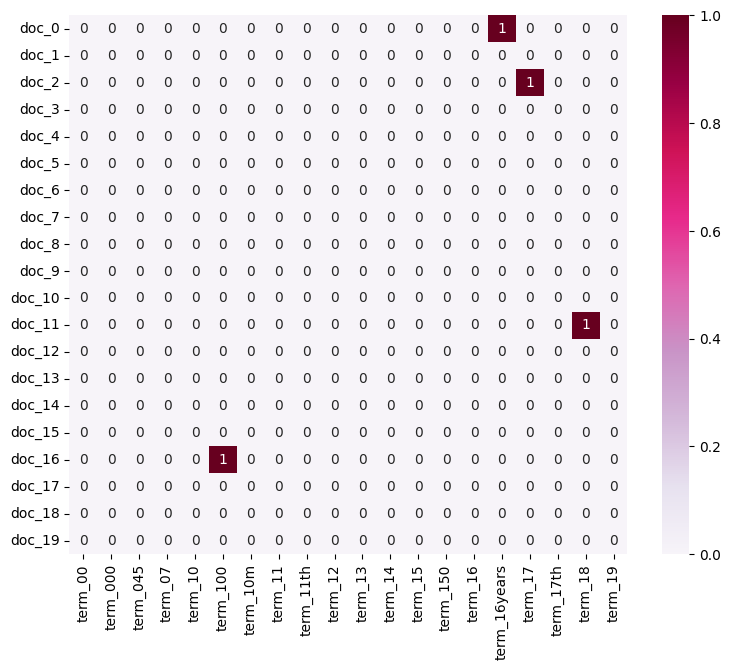

In [43]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

---

### 4.4 Attribute Transformation / Aggregation

### Plot frequencies chart

In [44]:
# Plot the graph using plotly.express
import plotly.express as px

term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

features = count_vect.get_feature_names_out()[:300]
frequencies = term_frequencies[:300]

# Create a DataFrame for Plotly
data = pd.DataFrame({'Feature': features, 'Frequency': frequencies})

# Create the bar plot
fig = px.bar(data, x='Feature', y='Frequency', title='Term Frequencies', 
              labels={'Feature': 'Features', 'Frequency': 'Term Frequencies'})

# Update layout to rotate x-axis labels
fig.update_layout(xaxis_tickangle=-90, height=600, width=1200)

# Show the plot
fig.show()

---

### Sort terms on x-axis

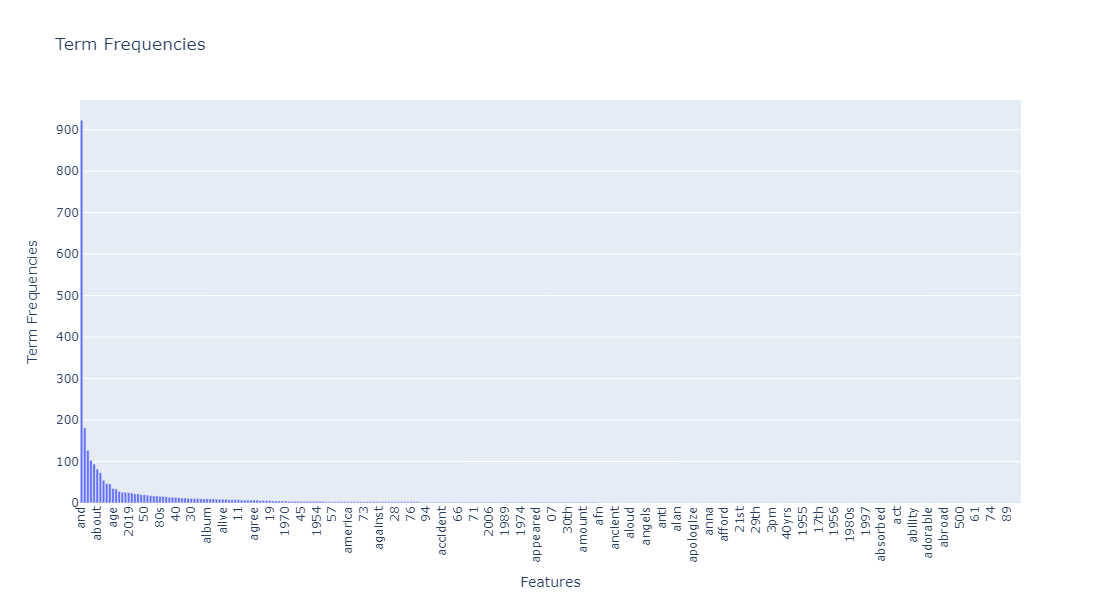

In [45]:
import plotly.express as px

features = count_vect.get_feature_names_out()[:300]
frequencies = term_frequencies[:300]

# Create a DataFrame for Plotly
data = pd.DataFrame({'Feature': features, 'Frequency': frequencies})

# sort the data through frequency
sorted_data = data.sort_values(by='Frequency', ascending=False)

# Create the bar plot
fig = px.bar(sorted_data, x='Feature', y='Frequency', title='Term Frequencies', 
              labels={'Feature': 'Features', 'Frequency': 'Term Frequencies'})

# Update layout to rotate x-axis labels
fig.update_layout(xaxis_tickangle=-90, height=600, width=1200)

# Show the plot
fig.show()

---

### Make the frequency into log

In [46]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

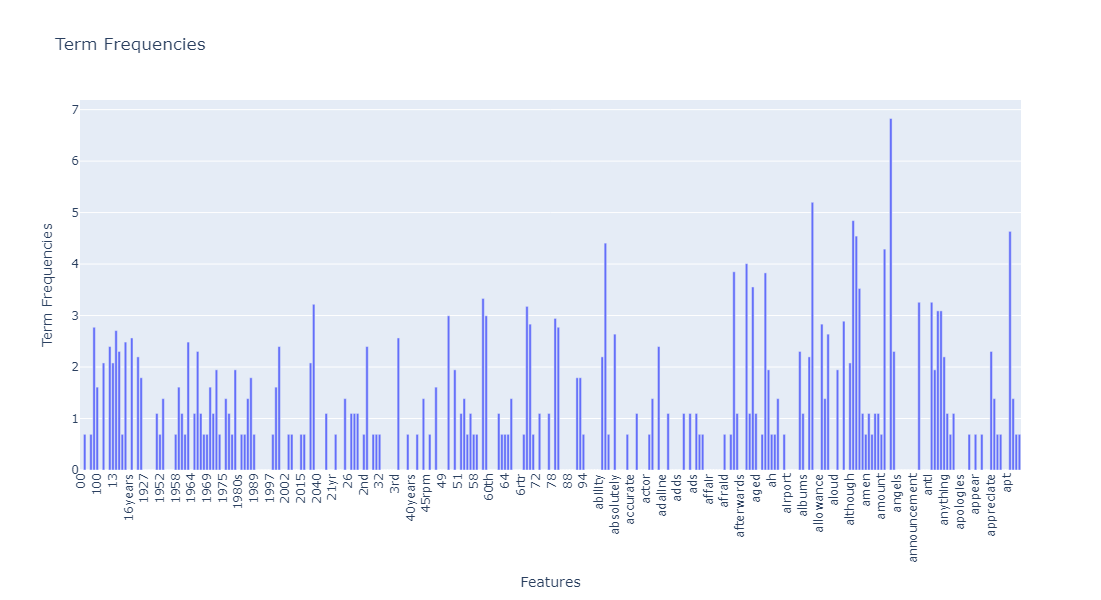

In [47]:
features = count_vect.get_feature_names_out()[:300]
frequencies = term_frequencies_log[:300]

# Create a DataFrame for Plotly
data = pd.DataFrame({'Feature': features, 'Frequency': frequencies})

# Create the bar plot
fig = px.bar(data, x='Feature', y='Frequency', title='Term Frequencies', 
              labels={'Feature': 'Features', 'Frequency': 'Term Frequencies'})

# Update layout to rotate x-axis labels
fig.update_layout(xaxis_tickangle=-90, height=600, width=1200)

# Show the plot
fig.show()

---

### Finding frequent patterns

In [48]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = X['sentiment'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['sentiment'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [49]:
# Display the filtered DataFrame for one of the categories
category_number=0 # can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category not nostalgia:


00  000  045  10  100  10m  11  12  14  15  ...  youngest  youngsters  \
0     0    0    0   0    0    0   0   0   0   0  ...         0           0   
1     0    0    0   0    0    0   0   0   0   0  ...         0           0   
2     0    0    0   0    0    0   0   0   0   0  ...         0           0   
3     0    0    0   0    0    0   0   0   0   0  ...         0           0   
4     0    0    0   0    0    0   0   0   0   0  ...         0           0   
..   ..  ...  ...  ..  ...  ...  ..  ..  ..  ..  ...       ...         ...   
745   0    0    0   0    0    0   0   0   0   0  ...         0           0   
746   0    0    0   0    0    0   0   0   0   0  ...         0           0   
747   0    0    0   0    0    0   0   0   0   0  ...         0           0   
748   0    0    0   0    0    0   0   0   0   0  ...         0           0   
749   0    0    0   0    0    0   0   0   0   0  ...         0           0   

     your  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0       0         0      0        0    0    0        0      0  
1       0         0      0        0    0    0        0      0  
2       0         0      0        0    0    0        0      0  
3       0         0      0        0    0    0        0      0  
4       0         0      0        0    0    0        0      0  
..    ...       ...    ...      ...  ...  ...      ...    ...  
745     0         0      0        0    0    0        0      0  
746     0         0      0        0    0    0        0      0  
747     0         0      0        0    0    0        0      0  
748     1         0      0        0    0    0        0      0  
749     0         0      0        0    0    0        0      0  

[750 rows x 2602 columns]

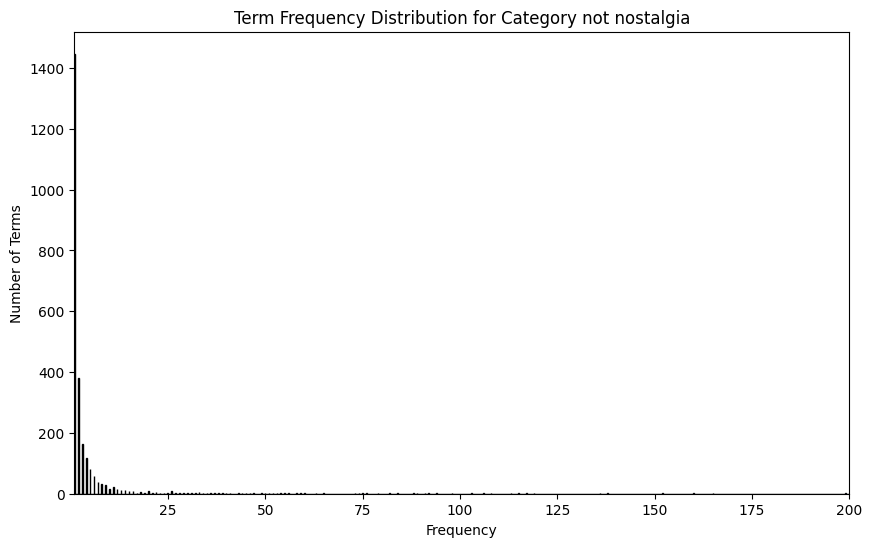

In [50]:
# Sum over all documents to get total frequency for each word
category_number=0 # can change it from 0 to 1 (""nostalgia" vs "not nostalgia")
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [51]:
category_number=0 # can change it from 0 to 1 (""nostalgia" vs "not nostalgia")
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: not nostalgia
Number of terms in top 5%: 130
Filtered terms: ['the', 'this', 'and', 'to', 'of', 'song', 'it', 'is', 'in', 'you', 'that', 'my', 'love', 'music', 'was', 'for', 'so', 'have', 'one', 'like', 'but', 'he', 'with', 'great', 'all', 'what', 'on', 'not', 'be', 'voice', 'can', 'me', 'just', 'beautiful', 'as', 'songs', 'time', 'her', 'she', 'will', 'they', 'when', 'from', 'his', 'at', 'are', 'always', 'good', 'no', 'never', 'know', 'now', 'about', 'much', 'who', 'really', 'more', 'we', 'if', 'best', 'by', 'ever', 'thank', 'would', 'think', 'still', 'only', 'don', 'how', 'very', 'has', 'there', 'am', 'out', 'could', 'him', 'these', 'old', 'an', 'up', 'do', 'listen', 'hear', 'singer', 'had', 'many', 'here', 'such', 'too', 'today', 'version', 'been', 'world', 'heard', 'most', 'your', 'get', 'people', 'some', 'video', 'man', 'sing', 'listening', 'real', 'than', 'were', 'years', 'nice', 'singing', 'heart', 'their', 'better', 'life', 'day', 'its', 'way', 'did', 'god', 'come', '

---

#### Explore frequemcy for top 5%

In [52]:
sorted_counts #We can see the frequencies sorted in a descending order

array([708, 453, 451, ...,   1,   1,   1], dtype=int64)

In [53]:
sorted_indices #This are the indices corresponding to the words after being sorted in a descending order

array([2276, 2290,  160, ..., 1509, 1510,    0], dtype=int64)

In [54]:
filt_term_document_dfs[categories[category_number]].loc[:,'the'].sum(axis=0) #Here we can sum up the column corresponding to the top 5% words, we just specify which one first.

708

This means that "the" in the "not nostalgia" set has a frequency of 708.

---

#### Explore frequency for bottom 5%

In [55]:
category_number = 0 # can change it from 0 to 1 (""nostalgia" vs "not nostalgia")
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: not nostalgia
Number of terms in bottom 1%: 26
Filtered terms: ['00', 'montgomery', 'money', 'monday', 'moments', 'mocking', 'mock', 'mitch', 'misunderstood', 'minute', 'minds', 'miller', 'monumental', 'millennium', 'miles', 'microphone', 'miami', 'meta', 'mess', 'merle', 'mendes', 'mended', 'melting', 'melt', 'melodica', 'milestone']


In [56]:
sorted_counts #We can see the frequencies sorted in an ascending order

array([  1,   1,   1, ..., 451, 453, 708], dtype=int64)

In [57]:
sorted_indices #This are the indices corresponding to the words after being sorted in an ascending order

array([   0, 1510, 1509, ...,  160, 2290, 2276], dtype=int64)

In [58]:
filt_term_document_dfs[categories[category_number]].loc[:,'milestone'].sum(axis=0) #Here we can sum up the column corresponding to the bottom 1% words, we just specify which one first.

1

This means that "milestone" in the "not nostalgia" set has frequency of 1.

---

#### Filter top 5% and bottom 1% through the sum

In [59]:
category_number=0 # can change it from 0 to 1 (""nostalgia" vs "not nostalgia")

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]


For category not nostalgia we filter the following words:
Bottom 1.0% words: 
00               1
montgomery       1
money            1
monday           1
moments          1
mocking          1
mock             1
mitch            1
misunderstood    1
minute           1
minds            1
miller           1
monumental       1
millennium       1
miles            1
microphone       1
miami            1
meta             1
mess             1
merle            1
mendes           1
mended           1
melting          1
melt             1
melodica         1
milestone        1
dtype: int64
Top 5.0% words: 
first       23
classic     23
amazing     24
wish        24
make        25
          ... 
of         361
to         394
and        451
this       453
the        708
Length: 130, dtype: int64

For category nostalgia we filter the following words:
Bottom 1.0% words: 
yup            1
gospel         1
rose           1
round          1
rousing        1
goodness       1
routine        1
row         

000  045  10  100  10m  11  12  14  15  150  ...  younger  youngest  \
0      0    0   0    0    0   0   0   0   0    0  ...        0         0   
1      0    0   0    0    0   0   0   0   0    0  ...        0         0   
2      0    0   0    0    0   0   0   0   0    0  ...        0         0   
3      0    0   0    0    0   0   0   0   0    0  ...        0         0   
4      0    0   0    0    0   0   0   0   0    0  ...        0         0   
..   ...  ...  ..  ...  ...  ..  ..  ..  ..  ...  ...      ...       ...   
745    0    0   0    0    0   0   0   0   0    0  ...        0         0   
746    0    0   0    0    0   0   0   0   0    0  ...        0         0   
747    0    0   0    0    0   0   0   0   0    0  ...        0         0   
748    0    0   0    0    0   0   0   0   0    0  ...        0         0   
749    0    0   0    0    0   0   0   0   0    0  ...        0         0   

     youngsters  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0             0         0      0        0    0    0        0      0  
1             0         0      0        0    0    0        0      0  
2             0         0      0        0    0    0        0      0  
3             0         0      0        0    0    0        0      0  
4             0         0      0        0    0    0        0      0  
..          ...       ...    ...      ...  ...  ...      ...    ...  
745           0         0      0        0    0    0        0      0  
746           0         0      0        0    0    0        0      0  
747           0         0      0        0    0    0        0      0  
748           0         0      0        0    0    0        0      0  
749           0         0      0        0    0    0        0      0  

[750 rows x 2446 columns]

---

#### Analysis on data frequency >= 1

In [60]:
from PAMI.extras.DF2DB import DenseFormatDF as db

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document_dfs[category])
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)


Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.693460490463215
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.213372063492091
Variance in Transaction Sizes : 52.10372252435774
Sparsity : 0.9959733855996001


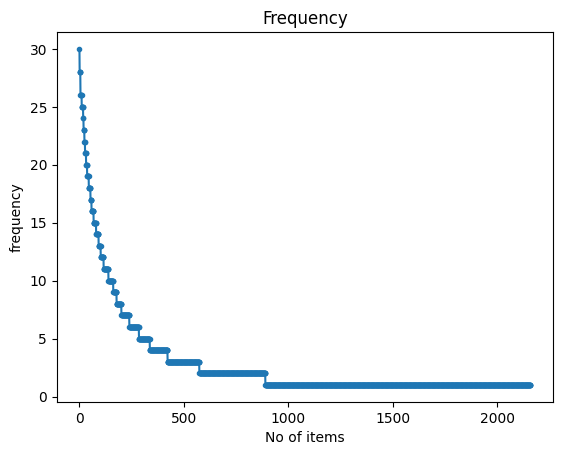

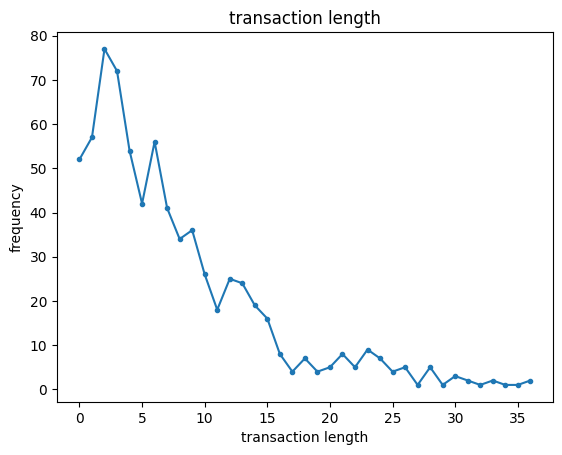

In [61]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 746
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.402144772117962
Maximum Transaction Size : 46
Standard Deviation Transaction Size : 5.950348241365226
Variance in Transaction Sizes : 35.4541698904223
Sparsity : 0.9965649449010148


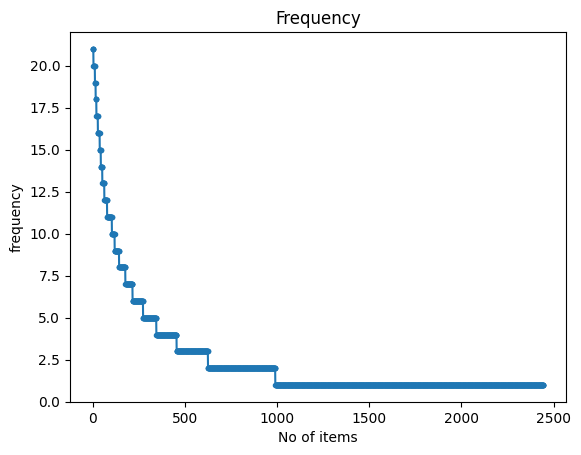

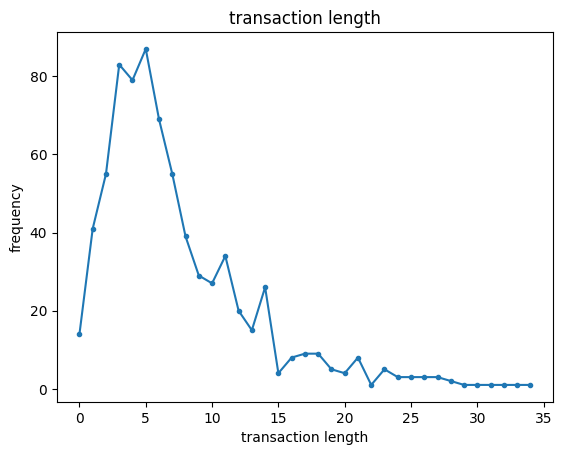

In [62]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

### Go mining for patterns

#### Nostalgia

nostalgia analysis using FPGrowth, minSup = 9

In [63]:
# mine for patterns using the FPGrowth algorithm
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia = obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 180
Runtime: 0.006671428680419922


In [64]:
obj1.save('freq_patterns_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_nostalgia

Patterns  Support
0        find        9
1        down        9
2         few        9
3         its        9
4        sure        9
..        ...      ...
175      ever       28
176     would       28
177      will       28
178        go       28
179  favorite       30

[180 rows x 2 columns]

---

nostalgia analysis using FAE Top-K, kCount = 500

In [65]:
from PAMI.frequentPattern.topk import FAE as alg1
kCount = 500
obj4 = alg1.FAE(iFile='td_freq_db_nostalgia.csv', k=kCount)
obj4.mine()
frequentPatternsnostalgia = obj4.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsnostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj4.getRuntime())) #measure the runtime
print(frequentPatternsnostalgia)

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 500
Runtime: 0.06931757926940918
       Patterns  Support
0      favorite       30
1          ever       28
2         would       28
3          will       28
4            go       28
..          ...      ...
495   don house        4
496   god bless        4
497  brenda lee        4
498      august        3
499      roller        3

[500 rows x 2 columns]


---

nostalgia analysis using MaxFPGrowth, minSup = 9

In [66]:
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg2

minimumSupportCount = 9
obj = alg2.MaxFPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minimumSupportCount)
obj.mine()
frequentPatternsnostalgia = obj.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsnostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) #measure the runtime
print(frequentPatternsnostalgia)

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 176
Runtime: 0.0070133209228515625
      Patterns  Support
0       karen         9
1       right         9
2       place         9
3     records         9
4         yes         9
..         ...      ...
171        go        28
172      will        28
173     would        28
174      ever        28
175  favorite        30

[176 rows x 2 columns]


---

#### Not nostalgia

not nostalgia analysis using FPGrowth, minSup = 9

In [67]:
# mine for patterns using the FPGrowth algorithm
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_not_nostalgia = obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 144
Runtime: 0.005513429641723633


In [68]:
obj1.save('freq_patterns_not_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_not_nostalgia

Patterns  Support
0    favorites        9
1      special        9
2         soul        9
3         mind        9
4           60        9
..         ...      ...
139      elvis       21
140      every       21
141      loved       21
142       them       21
143     lyrics       21

[144 rows x 2 columns]

---

not nostalgia analysis using FAE Top-K, kCount = 500

In [69]:
from PAMI.frequentPattern.topk import FAE as alg1
kCount = 500
obj4 = alg1.FAE(iFile='td_freq_db_not nostalgia.csv', k=kCount)
obj4.mine()
frequentPatternsnot_nostalgia = obj4.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsnot_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj4.getRuntime())) #measure the runtime
print(frequentPatternsnot_nostalgia)

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 500
Runtime: 0.058110952377319336
    Patterns  Support
0      elvis       21
1      every       21
2      loved       21
3       them       21
4     lyrics       21
..       ...      ...
495    while        3
496     aren        3
497     line        3
498   beyond        3
499  soulful        3

[500 rows x 2 columns]


---

not nostalgia analysis using MaxFPGrowth, minSup = 9

In [70]:
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg2

minimumSupportCount = 9
obj = alg2.MaxFPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minimumSupportCount)
obj.mine()
frequentPatternsnot_nostalgia = obj.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsnot_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) #measure the runtime
print(frequentPatternsnot_nostalgia)

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 144
Runtime: 0.006966114044189453
    Patterns  Support
0       end         9
1    almost         9
2     happy         9
3        ll         9
4      born         9
..       ...      ...
139  lyrics        21
140    them        21
141   loved        21
142   every        21
143   elvis        21

[144 rows x 2 columns]


In [71]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsnot_nostalgia, frequentPatternsnostalgia]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

     Patterns  Support
215     ever        28
214    would        28
213     will        28
212      kid        26
211     only        26
..        ...      ...
96        tv         9
95     until         9
94   records         9
1     almost         9
0        end         9

[216 rows x 2 columns]
Number of patterns discarded: 104


In [72]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['comment'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  045  07  10  100  10m  11  11th  12  ...  its   player   left   \
0      0    0    0   0   0    0    0   0     0   0  ...     0        0      0   
1      0    0    0   0   0    0    0   0     0   0  ...     0        0      0   
2      0    0    0   0   0    0    0   0     0   0  ...     0        0      0   
3      0    0    0   0   0    0    0   0     0   0  ...     0        0      0   
4      0    0    0   0   0    0    0   0     0   0  ...     0        0      0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...   ...      ...    ...   
1495   0    0    0   0   0    0    0   0     0   0  ...     0        0      0   
1496   0    0    0   0   0    0    0   0     0   0  ...     0        0      0   
1497   0    0    0   0   0    0    0   0     0   0  ...     0        0      0   
1498   0    0    0   0   0    0    0   0     0   0  ...     0        0      0   
1499   0    0    0   0   0    0    0   0     0   0  ...     0        0      0   

      together   along   tv   until   records   almost   end   
0             0       0    0       0         0        0     0  
1             0       0    0       0         0        0     0  
2             0       0    0       0         0        0     0  
3             0       0    0       0         0        0     0  
4             0       0    0       0         0        0     0  
...         ...     ...  ...     ...       ...      ...   ...  
1495          0       0    0       0         0        0     0  
1496          0       0    0       0         0        0     0  
1497          0       0    0       0         0        0     0  
1498          0       0    0       0         0        0     0  
1499          0       0    0       0         0        0     0  

[1500 rows x 3946 columns]

---

### 4.5 Dimensionality Reduction

Dimensionality reduction using PCA, dimension = 2

In [73]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA
X_tdm = count_vect.fit_transform(X['comment'])  # X['comment'] contains your text data
terms = count_vect.get_feature_names_out()
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)
X_pca_tdm = PCA(n_components = 2).fit_transform(tdm_df.values)

In [74]:
X_pca_tdm.shape

(1500, 2)

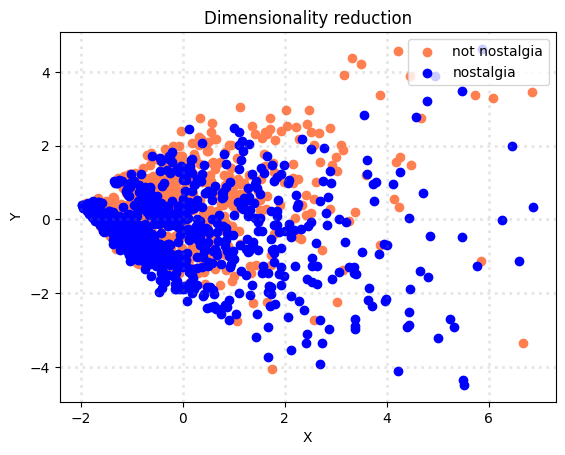

In [75]:
col = ['coral', 'blue', 'black', 'orange']
categories = X['sentiment'].unique()

def plot_scatter(X_reduced):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]
        ys = X_reduced[X['sentiment'] == category].T[1]
        plt.scatter(xs, ys, c=c, marker='o', label=category)
    
    plt.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    plt.legend(loc='upper right')


plot_scatter(X_pca_tdm)
plt.title("Dimensionality reduction")
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

---

### 4.6 Discretization and Binarization

In [76]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [77]:
mlb = preprocessing.LabelBinarizer()

In [78]:
mlb.fit(X.categories)

LabelBinarizer()

In [79]:
X['bin_category'] = mlb.transform(X['categories']).tolist()

In [80]:
X[0:9]

sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4      nostalgia  listening to his songs reminds me of my mum wh...   
5      nostalgia  Every time I heard this song as a child, I use...   
6      nostalgia  My dad loved listening to Jim Reeves, when I w...   
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...   
8  not nostalgia           Wherever you  are you always in my heart   

   categories                                           unigrams  \
0           0  [He, was, a, singer, with, a, golden, voice, t...   
1           1  [The, mist, beautiful, voice, ever, I, listene...   
2           1  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3           0  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4           1  [listening, to, his, songs, reminds, me, of, m...   
5           1  [Every, time, I, heard, this, song, as, a, chi...   
6           1  [My, dad, loved, listening, to, Jim, Reeves, ,...   
7           1  [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...   
8           0   [Wherever, you, are, you, always, in, my, heart]   

                                      tokenized_text bin_category  
0  {You, now., singers, we, Thank, age, in, days,...          [0]  
1  {The, forgotten, beautiful, singing, mist, and...          [1]  
2  {just, so, age, songs., had, 17., grow, Jesus,...          [1]  
3  {2nd, pray, Thank, are, Viet, be, man, This, i...          [0]  
4  {reminds, everyday, mum, to, listening, my, wh...          [1]  
5  {used, your, Every, got, death,, time, over, f...          [1]  
6  {teenager, in, things., didn't, Jim, it, loved...          [1]  
7  {tunes, 71, in, TO, LISTENED, music., Reeves, ...          [1]  
8        {you, always, are, Wherever, my, in, heart}          [0]

---

# Part 5: Data Exploration

Take three documents and compare

In [81]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

Take a look at the documents

In [82]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['My grandma really loved elvis ???s music .. so we played this song at her funeral .. everytime i listen to this Song there are so many memories in my head']
["My grandad listens this on a CD with me and I learned the words but sadly he passed away and we will miss and love him I lost him when I'm 11 I will always miss him:("]


In [83]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


---

# Part 6: Data Classification

In [84]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['categories', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['categories'], test_size=0.3, random_state=42)

In [85]:
X_train

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
485    0    0    0   0   0    0    0   0     0   0  ...      0         0   
527    0    0    0   0   0    0    0   0     0   0  ...      0         0   
199    0    0    0   0   0    0    0   0     0   0  ...      0         0   
889    0    0    0   0   0    0    0   0     0   0  ...      0         0   
844    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1130   0    0    0   0   1    0    0   0     0   0  ...      0         0   
1294   0    0    0   0   0    0    0   0     0   0  ...      0         0   
860    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1459   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1126   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
485       0         0        0    0    0    0        0      0  
527       0         0        0    0    0    0        0      0  
199       0         0        0    0    0    0        0      0  
889       0         0        0    0    0    0        0      0  
844       0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1130      0         0        0    0    0    0        0      0  
1294      0         0        0    0    0    0        0      0  
860       0         0        0    0    0    0        0      0  
1459      0         0        0    0    0    0        0      0  
1126      0         0        0    0    0    0        0      0  

[1050 rows x 3730 columns]

In [86]:
X_test

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
1116   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1368   0    0    0   0   0    0    0   0     0   0  ...      0         0   
422    0    0    0   0   0    0    0   0     0   0  ...      0         0   
413    0    0    0   0   0    0    0   0     0   0  ...      0         0   
451    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1083   0    0    0   0   0    0    0   0     0   0  ...      0         0   
990    0    0    0   0   0    0    0   0     0   0  ...      0         0   
650    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1188   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1498   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
1116      0         0        0    0    0    0        0      0  
1368      0         0        0    0    0    0        0      0  
422       0         0        0    0    0    0        0      0  
413       0         0        0    0    0    0        0      0  
451       0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1083      0         0        0    0    0    0        0      0  
990       0         0        0    0    0    0        0      0  
650       0         0        0    0    0    0        0      0  
1188      0         0        0    0    0    0        0      0  
1498      0         0        0    0    0    0        0      0  

[450 rows x 3730 columns]

In [87]:
#Model with the augmented data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['categories', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['categories'], test_size=0.3, random_state=42)

In [88]:
X_train

00  000  045  07  10  100  10m  11  11th  12  ...  its   player   left   \
485    0    0    0   0   0    0    0   0     0   0  ...     0        0      0   
527    0    0    0   0   0    0    0   0     0   0  ...     0        0      0   
199    0    0    0   0   0    0    0   0     0   0  ...     0        0      0   
889    0    0    0   0   0    0    0   0     0   0  ...     0        0      0   
844    0    0    0   0   0    0    0   0     0   0  ...     0        0      0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...   ...      ...    ...   
1130   0    0    0   0   1    0    0   0     0   0  ...     0        0      0   
1294   0    0    0   0   0    0    0   0     0   0  ...     0        0      0   
860    0    0    0   0   0    0    0   0     0   0  ...     0        0      0   
1459   0    0    0   0   0    0    0   0     0   0  ...     0        0      0   
1126   0    0    0   0   0    0    0   0     0   0  ...     0        0      0   

      together   along   tv   until   records   almost   end   
485           0       0    0       0         0        0     0  
527           0       0    0       0         0        0     0  
199           0       0    0       0         0        0     0  
889           0       0    0       0         0        0     0  
844           0       0    0       1         0        0     0  
...         ...     ...  ...     ...       ...      ...   ...  
1130          0       0    0       0         0        0     0  
1294          0       0    1       0         0        0     0  
860           0       0    0       0         0        0     0  
1459          0       0    0       0         0        0     0  
1126          0       0    0       0         0        0     0  

[1050 rows x 3946 columns]

In [89]:
X_test

00  000  045  07  10  100  10m  11  11th  12  ...  its   player   left   \
1116   0    0    0   0   0    0    0   0     0   0  ...     0        0      0   
1368   0    0    0   0   0    0    0   0     0   0  ...     0        0      0   
422    0    0    0   0   0    0    0   0     0   0  ...     0        0      0   
413    0    0    0   0   0    0    0   0     0   0  ...     0        0      0   
451    0    0    0   0   0    0    0   0     0   0  ...     0        0      0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...   ...      ...    ...   
1083   0    0    0   0   0    0    0   0     0   0  ...     0        0      0   
990    0    0    0   0   0    0    0   0     0   0  ...     0        0      0   
650    0    0    0   0   0    0    0   0     0   0  ...     0        0      0   
1188   0    0    0   0   0    0    0   0     0   0  ...     0        0      0   
1498   0    0    0   0   0    0    0   0     0   0  ...     0        0      0   

      together   along   tv   until   records   almost   end   
1116          0       0    0       0         0        0     0  
1368          0       0    0       0         0        0     0  
422           0       0    0       0         0        0     0  
413           0       0    0       0         0        0     0  
451           0       0    0       0         0        0     0  
...         ...     ...  ...     ...       ...      ...   ...  
1083          0       0    0       0         0        0     0  
990           0       0    0       0         0        0     0  
650           0       0    0       0         0        0     1  
1188          0       0    0       0         0        0     0  
1498          0       0    0       0         0        0     0  

[450 rows x 3946 columns]

In [90]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8466666666666667

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9105    0.7689    0.8337       225
    nostalgia     0.8000    0.9244    0.8577       225

     accuracy                         0.8467       450
    macro avg     0.8553    0.8467    0.8457       450
 weighted avg     0.8553    0.8467    0.8457       450




---


# Instruction 3

# Part 1: New data visualizations

## Visualization 1: A word cloud according to the word frequency

If running code is needed, please install the "wordcloud" library using "pip install wordcloud"

In [127]:
# import the libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Since WordCloud only takes in text data, we have to try to convert "comment" in dataframe into text data.

In [134]:
# convert "comment" column into a text data
comments = X['comment'].to_string(index=False)
wtb =open('comment.txt','w') 
wtb.write(comments)
wtb.close()

In [135]:
# generate a word cloud according to the word frequency in comment
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(comments)

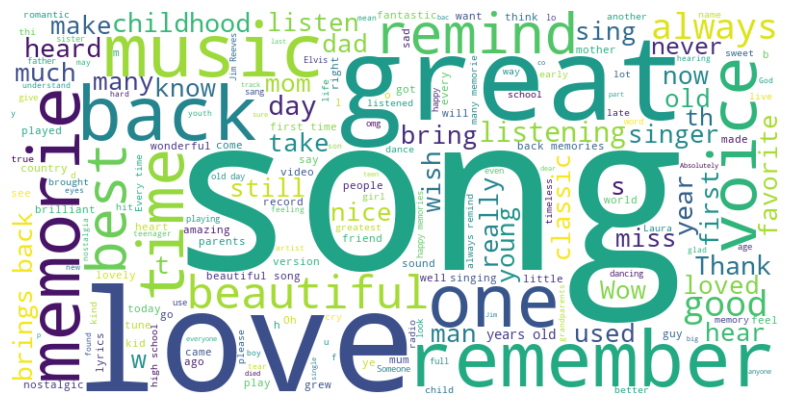

In [136]:
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---

## Visualization 2: TF-IDF heatmap

In [14]:
# import stuff we needed
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

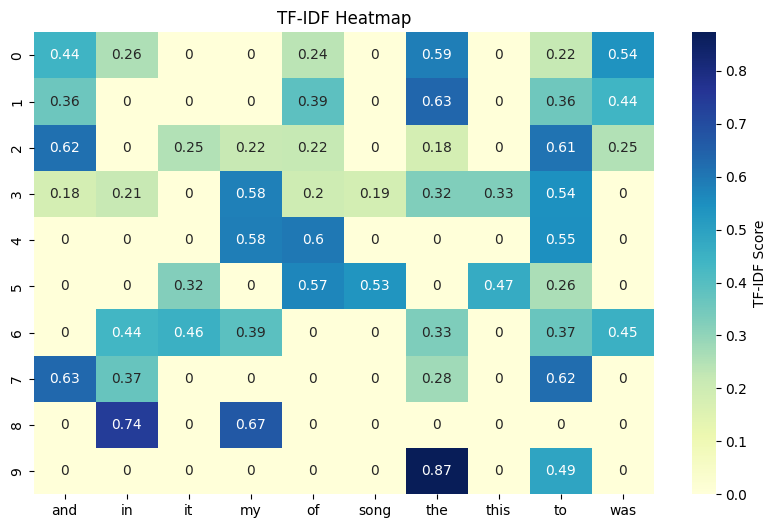

In [18]:
# initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 10)

# fit and transform the "comment" into TF-IDF
tfidf_matrix = vectorizer.fit_transform(X['comment'])

# get feature names
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Step 4: Select only the first 10 rows for the heatmap
tfidf_df = tfidf_df.head(10)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(tfidf_df, annot=True, cmap="YlGnBu", cbar_kws={'label': 'TF-IDF Score'})
plt.title("TF-IDF Heatmap")
plt.show()

---

# Part 2: TF-IDF features

We use the comment column in the dataframe

In [17]:
# import stuff we needed
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize

# initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# fit and transform the "comment" into TF-IDF
tfidf_matrix = vectorizer.fit_transform(X['comment'])

# get feature names
feature_names = vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to a dense array
dense_tfidf_matrix = tfidf_matrix.todense()


# print out the first 20 data of the tfidf matrix
dense_tfidf_matrix[0:20], feature_names[0:20]

(matrix([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]),
 array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12',
        '13', '14', '15', '150', '16', '16years', '17', '17th', '18', '19'],
       dtype=object))

---

# Part 3: Naive Basys Classifier

## Construction of data

#### In this part, we construct the data of X_train, X_test, y_train, y_test for future analysis

In [111]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X['comment'], X['categories'], test_size=0.3, random_state=42)

## Multinomial Naive Basys Classifier

#### In datasets that puts emphasis on frequency, we use multinomial basys classifier.
#### Therefore, we use multinomial basys classifier on document-term frequency data.

In [112]:
# Word frequency features using CountVectorizer
count_vectorizer = CountVectorizer()
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)

In [113]:
# Train the Multinomial Naive Bayes
multi_classifier = MultinomialNB()
multi_classifier.fit(X_train_counts, y_train)

# Make predictions on the test set
y_pred = multi_classifier.predict(X_test_counts)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8422222222222222

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9140    0.7556    0.8273       225
    nostalgia     0.7917    0.9289    0.8548       225

     accuracy                         0.8422       450
    macro avg     0.8528    0.8422    0.8410       450
 weighted avg     0.8528    0.8422    0.8410       450



# Bernoulli Naive Bayes Classifier

#### In datasets that puts emphasis on the presence of data, we use Bernoulli Naive Bayes Classifier.
#### Therefore, we use Bernoulli Naive Bayes Classifier on TF-IDF data.

In [114]:
# TF-IDF features using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [115]:
# Bernoulli Naive Bayes with TF-IDF Features
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = bernoulli_nb.predict(X_test_tfidf)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8733333333333333

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9078    0.8311    0.8677       225
    nostalgia     0.8443    0.9156    0.8785       225

     accuracy                         0.8733       450
    macro avg     0.8760    0.8733    0.8731       450
 weighted avg     0.8760    0.8733    0.8731       450




---

# Instruction 4

Inefficient parts: 
1. The words are too sparse. Some of the words only appear once. These words not only wastes space, but also make people hard to analyze. <br>
-> My thought to solve: Ignore the words that only appear once. Or use the TF-IDF feature first.

2. The words that use the most often are usually conjunctions, such as "the", "and" or pronouns like "I". <br>
-> My thought to solve: Make a pronouns table and conjunctions table according to English grammar books. If we see the words that contain these words, we should ignore it.

Maybe after doing those preprocessing, we are able to easily analyze words that may be connected to "nostalgia" and "not nostalgia".

---